In [2]:
import gym
import numpy as np
import os
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import PPO2
from SDNController import SDNController
from stable_baselines import results_plotter
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines.common.callbacks import BaseCallback
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
time_steps = 1000
max_ticks = 100
rewards_check_freq = 100
test_steps = 10

In [5]:
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """
    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

            # Retrieve training reward
            x, y = ts2xy(load_results(self.log_dir), 'timesteps')
            if len(x) > 0:
                # Mean training reward over the last 100 episodes
                mean_reward = np.mean(y[-100:])
                if self.verbose > 0:
                    print("Num timesteps: {}".format(self.num_timesteps))
                    print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(self.best_mean_reward, mean_reward))

                # New best model, you could save the agent here
                if mean_reward > self.best_mean_reward:
                    self.best_mean_reward = mean_reward
                    # Example for saving best model
                    if self.verbose > 0:
                        print("Saving new best model to {}".format(self.save_path))
                    self.model.save(self.save_path)

        return True

In [8]:
# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

In [9]:
env = SDNController(max_ticks = max_ticks)
env = Monitor(env, log_dir)

In [10]:
model = PPO2(MlpPolicy, env, verbose=1)

# Create the callback: check every 100 steps
callback = SaveOnBestTrainingRewardCallback(check_freq=rewards_check_freq, log_dir=log_dir)

model.learn(total_timesteps=time_steps, callback=callback)

Wrapping the env in a DummyVecEnv.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Num timesteps: 100
Best mean reward: -inf - Last mean reward per episode: -579.00
Saving new best model to tmp/best_model
--------------------------------------
| approxkl           | 0.0005469609  |
| clipfrac           | 0.0           |
| ep_len_mean        | 100           |
| ep_reward_mean     | -579          |
| explained_variance | -0.000144     |
| fps                | 268           |
| n_updates          | 1             |
| policy_entropy     | 1.0980407     |
| policy_loss        | -0.0024280483 |
| serial_timesteps   | 128           |
| time_elapsed       | 1.81e-05      |
| total_timesteps    | 128           |
| value_loss         | 2964.6125     |
--------------------------------------

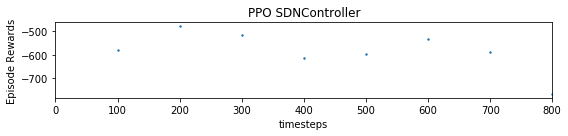

<Figure size 864x576 with 0 Axes>

In [11]:
results_plotter.plot_results([log_dir], time_steps, results_plotter.X_TIMESTEPS, "PPO SDNController")
plt.figure(figsize = (12,8))
plt.show()

### TESTING

In [12]:
model = PPO2(MlpPolicy, env, verbose=1)
model = PPO2.load("./tmp/best_model.zip")

# Enjoy trained agent
dones = True
for ix in range(test_steps):
    if dones:
        obs = env.reset() 
        curr_state = obs
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    print('Current state: ', curr_state, '\n', 'Action: ', action, '\n','Reward: ', rewards, '\n','Done: ', dones, '\n','Next state: ', obs, '\n','\n')
    curr_state = obs
    #env.render()

Wrapping the env in a DummyVecEnv.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Current state:  [ 7.80282547  7.69531741  5.          6.12783093  6.40206957  2.
 24.17223119 24.38579482 10.        ] 
 Action:  0 
 Reward:  -15 
 Done:  False 
 Next state:  [10.53608098  9.92999964  5.          7.80660019  7.74465674  2.
 25.19832711 24.3295875  10.        ] 
 

Current state:  [10.53608098  9.92999964  5.          7.80660019  7.74465674  2.
 25.19832711 24.3295875  10.        ] 
 Action:  0 
 Reward:  -15 
 Done:  False 
 Next state:  [11.79494215 12.36795913  5.          5.78629542  6.04074721  2.
 24.34477586 23.81262865 10.        ] 
 

Current state:  [11.79494215 12.36795913  5.          5.78629542  6.04074721  2.
 24.34477586 23.81262865 10.        ] 
 Action:  2 
 Reward:  -20 
 Done:  False 
 Next state:  [10.71054885 10.75153617  5.          7.55800336  7.17863276  2.
 23.89548806 24.34090259 10.        ] 
 

Current st